# 1

In [ ]:
# Done in 2nd File

# 2


• With real life example, differentiate between:

• Identification

• Classification

• Recognition

• Verification

• Authentication


• What loss functions can be suitable in each cases? Why?


To differentiate between **identification**, **classification**, **recognition**, **verification**, and **authentication**, let's consider a real-life example of a *facial recognition system.*

**Identification**: In facial identification, the system determines the identity of an individual by comparing their face with a database of known faces. It aims to find a match or determine if the person is unknown.




**Classification**: Classification involves assigning an input to one of several predefined classes or categories. In the context of facial recognition, classification can be used to categorize a face into different groups, such as age groups or emotions.




**Recognition**: Facial recognition involves identifying or verifying the identity of an individual by analyzing their facial features. It compares the input face with a database of known faces to find a match.



**Verification**: Verification is the process of confirming whether a claimed identity matches the provided evidence. In facial verification, the system compares the input face with a reference face to determine if they belong to the same person.



**Authentication**: Authentication is the process of confirming the identity of an individual based on their provided credentials or evidence. In facial authentication, the system verifies the identity of a person by comparing their face with a stored reference face.



**Loss functions** for each case:

Identification: For identification, a suitable loss function could be the **softmax cross-entropy loss**. This loss function is commonly used in multi-class classification problems, where the goal is to assign a probability distribution over multiple classes. It encourages the model to correctly identify the input face among a set of known faces.

Classification: For classification tasks, the **softmax cross-entropy loss** is also commonly used. It penalizes the model for assigning high probabilities to incorrect classes and encourages it to assign high probabilities to the correct class.

Recognition: In facial recognition, a suitable loss function could be the **contrastive loss or triplet loss**. These loss functions aim to learn embeddings (dense representations) of faces in a way that similar faces are closer together in the embedding space, while dissimilar faces are farther apart.

Verification: For facial verification, a suitable loss function could be the **binary cross-entropy loss**. This loss function is commonly used in binary classification problems, where the goal is to assign a probability of belonging to a certain class. It encourages the model to correctly classify whether the input face matches the reference face or not.

Authentication: Similar to verification, facial authentication can also use the **binary cross-entropy loss**. The goal is to classify whether the input face matches the stored reference face or not.



# 3


In [1]:
# • Try to implement this architecture and perform experiment on CIFAR100 dataset
# for 50 epochs with learning rate 0.01 and batch size of 256

# Input data - 32x32x3
# Conv 1 - 5*5 20 feature maps
# Max pooling 1 - 2*2 20 feature maps
# Conv 2 - 5*5 50 feature maps
# Max pooling 2 - 2*2 50 feature maps
# Fully connected 1 - 500 feature maps
# Fully connected 2 - 100 feature maps (classes)
# Softmax layer - 100 classes
# Relu activation function


In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

# Hyperparameters
num_epochs = 50
batch_size = 256
learning_rate = 0.01


In [3]:

# Define the network

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 20, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(20, 50, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(8*8*50, 500)
        self.fc2 = nn.Linear(500, 100)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(-1, 8*8*50)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = ConvNet()

In [4]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# Load the CIFAR100 dataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                        download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)



Files already downloaded and verified
Files already downloaded and verified


In [5]:

# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

# Test the model

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')




Epoch [1/50], Step [100/196], Loss: 4.6144, Accuracy: 0.78%
Epoch [2/50], Step [100/196], Loss: 4.6250, Accuracy: 0.78%
Epoch [3/50], Step [100/196], Loss: 4.6073, Accuracy: 1.17%
Epoch [4/50], Step [100/196], Loss: 4.6016, Accuracy: 0.39%
Epoch [5/50], Step [100/196], Loss: 4.6135, Accuracy: 0.78%
Epoch [6/50], Step [100/196], Loss: 4.6113, Accuracy: 0.78%
Epoch [7/50], Step [100/196], Loss: 4.6152, Accuracy: 1.95%
Epoch [8/50], Step [100/196], Loss: 4.6156, Accuracy: 0.39%
Epoch [9/50], Step [100/196], Loss: 4.6161, Accuracy: 0.78%
Epoch [10/50], Step [100/196], Loss: 4.6214, Accuracy: 0.78%
Epoch [11/50], Step [100/196], Loss: 4.6075, Accuracy: 1.17%
Epoch [12/50], Step [100/196], Loss: 4.6150, Accuracy: 0.78%
Epoch [13/50], Step [100/196], Loss: 4.6103, Accuracy: 0.78%
Epoch [14/50], Step [100/196], Loss: 4.6092, Accuracy: 1.17%
Epoch [15/50], Step [100/196], Loss: 4.6134, Accuracy: 0.39%
Epoch [16/50], Step [100/196], Loss: 4.6115, Accuracy: 1.17%
Epoch [17/50], Step [100/196], Lo

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=3200, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
)

Test Accuracy of the model on the 10000 test images: 1.0 %


<Figure size 640x480 with 0 Axes>

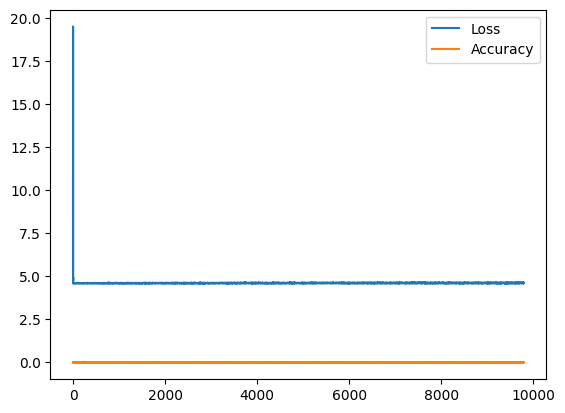

In [6]:

# Plot the loss and accuracy
plt.figure()
plt.plot(loss_list, label='Loss')
plt.plot(acc_list, label='Accuracy')
plt.legend()
plt.show()
